# Week 01: GenomicRanges - Basic GRanges Usage

## 01. IRanges - Basic Usage


### Overview
A surprising amount of objects/tasks in computational biology can be formulated in terms of integer intervals, manipulation of integer intervals and overlap of integer intervals.

Objects: A transcript (a union of integer intervals), a collection of SNPs (intervals of width 1), transcription factor binding sites, a collection of aligned short reads.

Tasks: Which transcription factor binding sites hit the promoter of genes (overlap between two sets of intervals), which SNPs hit a collection of exons, which short reads hit a predetermined set of exons.

IRanges are collections of integer intervals. GRanges are like IRanges, but with an associated chromosome and strand, taking care of some book keeping.

Here we discuss IRanges, which provides the foundation for GRanges. This package implements (amongst other things) an algebra for handling integer intervals.



### Dependencies

In [2]:
# This document has the following dependencies:
# BiocManager::install("IRanges")
library(IRanges)

In [19]:
## Plot Iranges
plotRanges <- function(x, xlim = x, main = deparse(substitute(x)),
                       col = "black", sep = 0.5, ...) {
    opar <- par(mar = c(5,1,1.5,1))
    on.exit(par(opar))
    height <- 1
    if (is(xlim, "Ranges"))
        xlim <- c(min(start(xlim)), max(end(xlim)))
    bins <- disjointBins(IRanges(start(x), end(x) + 1))
    plot.new()
    plot.window(xlim, c(0, max(bins)*(height + sep)))
    ybottom <- bins * (sep + height) - height
    rect(start(x)-0.5, ybottom, end(x)+0.5, ybottom + height, col = col, ...)
    title(main)
    axis(1)
}

### Basic IRanges

In [3]:
# Specify IRanges by 2 of start, end, width (SEW).
ir1 <- IRanges(start = c(1,3,5), end = c(3,5,7))
ir1

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         3         3
  [2]         3         5         3
  [3]         5         7         3

In [4]:
ir2 <- IRanges(start = c(1,3,5), width = 3)
all.equal(ir1, ir2)

[1] TRUE

An **IRanges** consist of separate intervals; each interval is called a `range`. So ir1 above contains 3 ranges.

Assessor methods: `start()`, `end()`, `width()` and also replacement methods.

In [5]:
start(ir1)

[1] 1 3 5

In [7]:
width(ir2) <- 1
ir2

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         3         3         1
  [3]         5         5         1

In [8]:
# They may have names
names(ir1) <- paste("A", 1:3, sep = "")
ir1

IRanges object with 3 ranges and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3
  A2         3         5         3
  A3         5         7         3

In [9]:
# They have a single dimension
dim(ir1)

NULL

In [10]:
length(ir1)

[1] 3

In [11]:
# Because of this, subsetting works like a vector
ir1[1]

IRanges object with 1 range and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3

In [12]:
ir1["A1"]

IRanges object with 1 range and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3

In [13]:
# Like vectors, you can concatenate two IRanges with the c() function
c(ir1, ir2)

IRanges object with 6 ranges and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3
  A2         3         5         3
  A3         5         7         3
             1         1         1
             3         3         1
             5         5         1

### Normal IRanges

A normal IRanges is a minimal representation of the IRanges viewed as a set. Each integer only occur in a single range and there are as few ranges as possible. In addition, it is ordered. Many functions produce a normal IRanges. Created by `reduce()`.

In [20]:
ir <- IRanges(start = c(1,3,7,9), end = c(4,4,8,10))
ir

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         4         4
  [2]         3         4         2
  [3]         7         8         2
  [4]         9        10         2

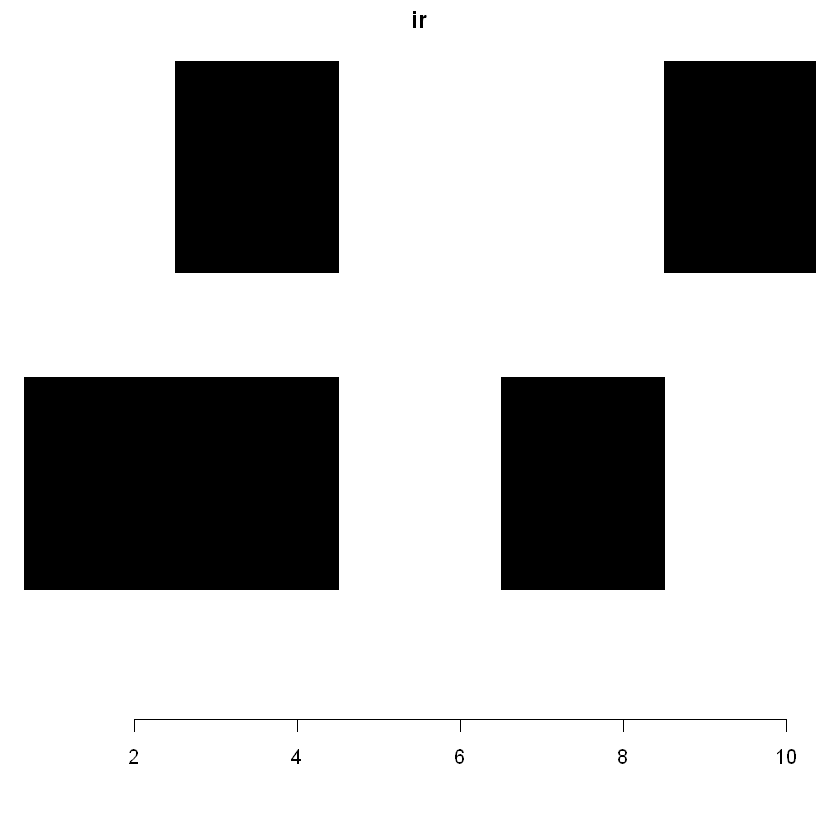

In [21]:
plotRanges(ir)

In [16]:
reduce(ir)

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         4         4
  [2]         7        10         4

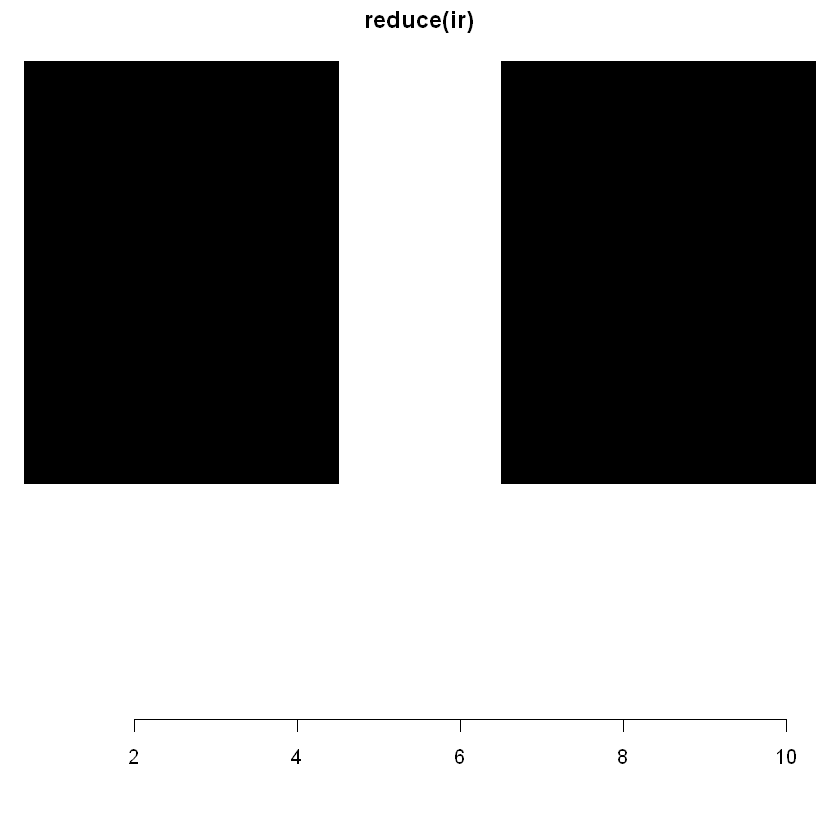

In [22]:
plotRanges(reduce(ir))

From some perspective, `disjoin()` is the opposite of reduce(). An example explains better:

In [18]:
ir1

IRanges object with 3 ranges and 0 metadata columns:
         start       end     width
     <integer> <integer> <integer>
  A1         1         3         3
  A2         3         5         3
  A3         5         7         3

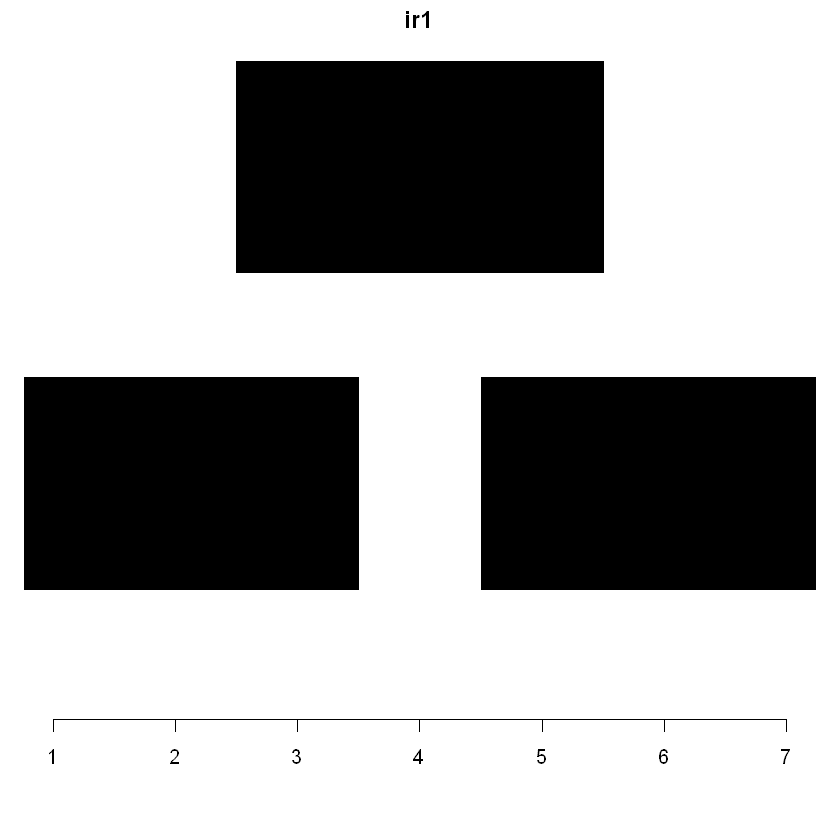

In [23]:
plotRanges(ir1)

In [17]:
disjoin(ir1)

IRanges object with 5 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         2         2
  [2]         3         3         1
  [3]         4         4         1
  [4]         5         5         1
  [5]         6         7         2

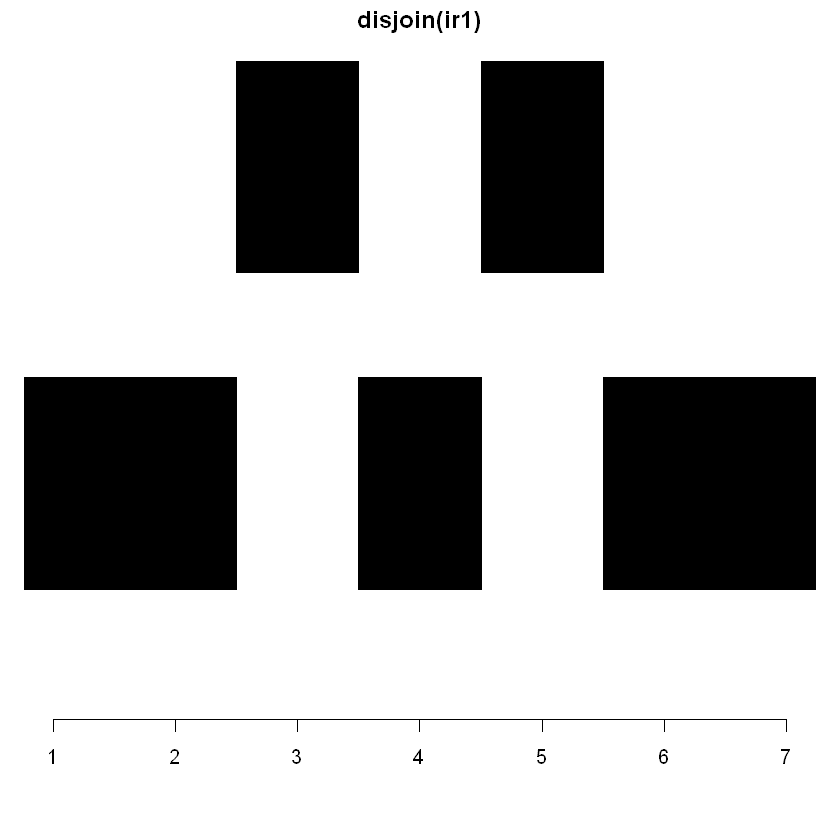

In [24]:
plotRanges(disjoin(ir1))

### Manipulating IRanges, intra-range
“Intra-range” manipulations are manipulations where each original range gets mapped to a new range.

Examples of these are: `shift()`, `narrow()`, `flank()`, `resize()`, `restrict()`.

For example, `resize()` can be extremely useful. It has a fix argument controlling where the resizing occurs from. Use fix="center" to resize around the center of the ranges; I use this a lot.

In [25]:
resize(ir, width = 1, fix = "start")

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         3         3         1
  [3]         7         7         1
  [4]         9         9         1

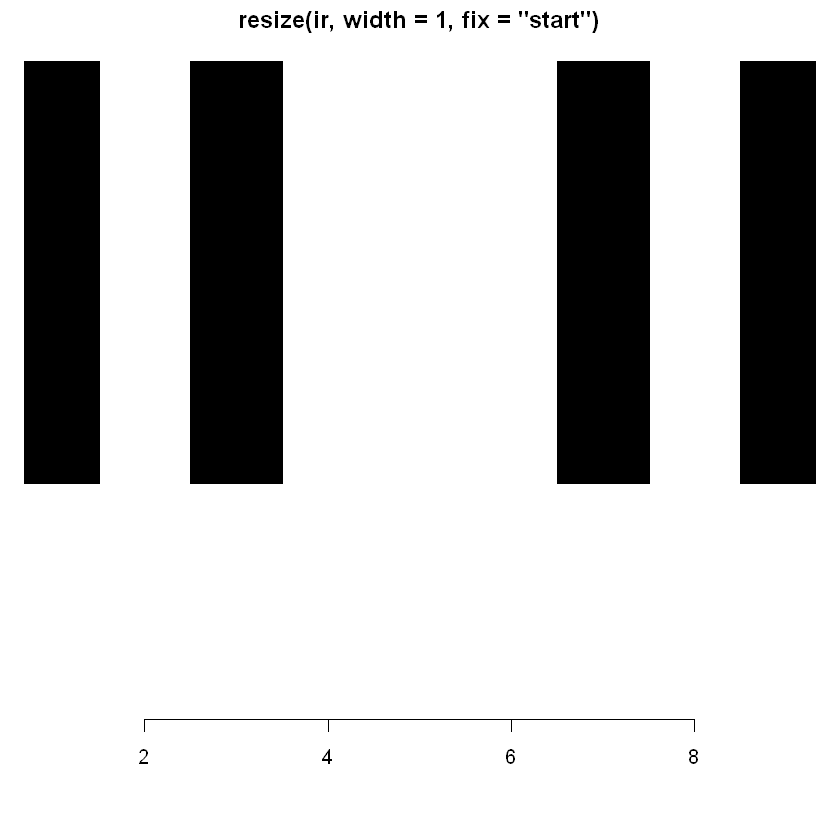

In [26]:
plotRanges(resize(ir, width = 1, fix = "start"))

In [27]:
resize(ir, width = 1, fix = "center")

IRanges object with 4 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         2         2         1
  [2]         3         3         1
  [3]         7         7         1
  [4]         9         9         1

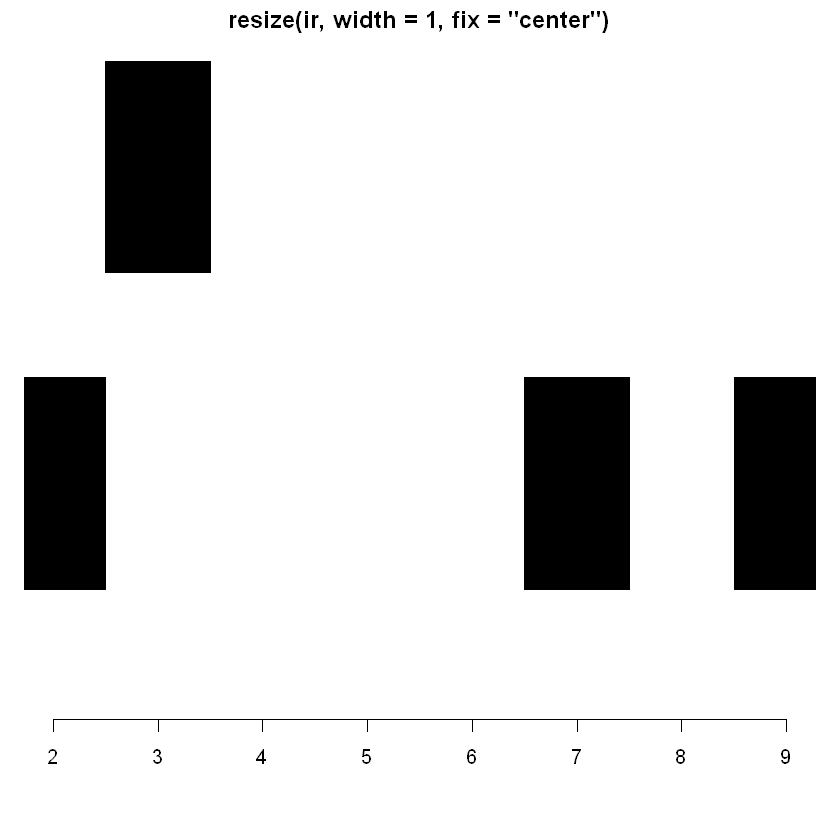

In [28]:
plotRanges(resize(ir, width = 1, fix = "center"))

### Manipulating IRanges, as sets

Manipulating IRanges as sets means that we view each IRanges as a set of integers; individual integers is either contained in one or more ranges or they are not. This is equivalent to calling reduce() on the IRanges first.

Once this is done, we can use standard: `union()`, `intersect()`, `setdiff()`, `gaps()` between two IRanges (which all returns normalized IRanges).

In [29]:
ir1 <- IRanges(start = c(1, 3, 5), width = 1)
ir2 <- IRanges(start = c(4, 5, 6), width = 1)
union(ir1, ir2)

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         3         6         4

In [30]:
intersect(ir1, ir2)

IRanges object with 1 range and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         5         5         1

In [31]:
# Because they return normalized IRanges, an alternative to union() is
reduce(c(ir1, ir2))

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         1         1
  [2]         3         6         4

There is also an element-wise (pair-wise) version of these: punion(), pintersect(), psetdiff(), pgap(); this is similar to say pmax from base R. In my experience, these functions are seldom used.

### Finding Overlaps
Finding (pairwise) overlaps between two IRanges is done by `findOverlaps()`. This function is very important and amazingly fast!

In [32]:
ir1 <- IRanges(start = c(1,4,8), end = c(3,7,10))
ir2 <- IRanges(start = c(3,4), width = 3)
ov <- findOverlaps(ir1, ir2)
ov

Hits object with 3 hits and 0 metadata columns:
      queryHits subjectHits
      <integer>   <integer>
  [1]         1           1
  [2]         2           1
  [3]         2           2
  -------
  queryLength: 3 / subjectLength: 2

It returns a Hits object which describes the relationship between the two IRanges. This object is basically a two-column matrix of indicies into the two IRanges.

The two columns of the hits object can be accessed by `queryHits()` and `subjectHits()` (often used with unique()).

For example, the first row of the matrix describes that the first range of ir1 overlaps with the first range of ir2. Or said differently, they have a non-empty intersection:

In [33]:
intersect(ir1[subjectHits(ov)[1]],
          ir2[queryHits(ov)[2]])

IRanges object with 0 ranges and 0 metadata columns:
       start       end     width
   <integer> <integer> <integer>

The elements of `unique(queryHits)` gives you the indices of the query ranges which actually had an overlap; you need unique because a query range may overlap multiple subject range

In [34]:
queryHits(ov)

[1] 1 2 2

In [35]:
unique(queryHits(ov))

[1] 1 2

*The list of arguments to `findOverlaps()` is long; there are a few hidden treasures here. For example, you can ask to only get an overlap if two ranges overlap by a certain number of bases.*

In [36]:
args(findOverlaps)

function (query, subject, maxgap = -1L, minoverlap = 0L, type = c("any", 
    "start", "end", "within", "equal"), select = c("all", "first", 
    "last", "arbitrary"), ...) 
NULL

### countOverlaps
For efficiency, there is also countOverlaps(), which just returns the number of overlaps. This function is faster and takes up less memory because it does not have to keep track of which ranges overlap, just the number of overlaps.

In [37]:
countOverlaps(ir1, ir2)

[1] 1 2 0

### Finding nearest IRanges
Sometimes you have two sets of IRanges and you need to know which ones are closest to each other. Functions for this include `nearest()`, `precede()`, `follow()`. Watch out for ties!

In [38]:
ir1

IRanges object with 3 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         3         3
  [2]         4         7         4
  [3]         8        10         3

In [39]:
ir2

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         3         5         3
  [2]         4         6         3

In [40]:
nearest(ir1, ir2)

[1] 1 1 2

## 02: GenomicRanges - GRanges

### Dependencies

In [2]:
# Install Genomic Ranges Library
library(GenomicRanges)

##

**`GRanges`** : `GRanges` are like `IRanges` with strand and chromosome. Strand can be +, - and *. The value * indicates ‘unknown strand’ or ‘unstranded’. This value usually gets treated as a third strand, which is sometimes confusing to users (examples below).

In [5]:
## They get created with the GRanges constructor:
gr <- GRanges(seqnames = "chr1", strand = c("+", "-", "+"),
              ranges = IRanges(start = c(1,3,5), width = 3))
gr

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      +
  [2]     chr1       3-5      -
  [3]     chr1       5-7      +
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

Natural accessor functions: 
- strand(), 
- seqnames(), 
- ranges(), 
- start(), 
- end(), 
- width().
Because the have strand, we now have operations which are relative to the direction of transcription (`upstream()`, `downstream()`):

In [4]:
flank(gr, 2, start = FALSE)

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       4-5      +
  [2]     chr1       1-2      -
  [3]     chr1       8-9      +
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [6]:
# GRanges, seqinfo
# GRanges operate within a universe of sequences (chromosomes/contigs) and their lengths.
# This is described through seqinfo:
seqinfo(gr)

Seqinfo object with 1 sequence from an unspecified genome; no seqlengths:
  seqnames seqlengths isCircular genome
  chr1             NA         NA   <NA>

In [7]:
seqlengths(gr) <- c("chr1" = 10)
seqinfo(gr)

Seqinfo object with 1 sequence from an unspecified genome:
  seqnames seqlengths isCircular genome
  chr1             10         NA   <NA>

In [8]:
seqlevels(gr)

[1] "chr1"

In [9]:
seqlengths(gr)

chr1 
  10

In [10]:
# Especially the length of the chromosomes are used by some functions. For example gaps() return the stretches of the genome not covered by the GRanges.
gaps(gr)

GRanges object with 5 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1         4      +
  [2]     chr1      8-10      +
  [3]     chr1       1-2      -
  [4]     chr1      6-10      -
  [5]     chr1      1-10      *
  -------
  seqinfo: 1 sequence from an unspecified genome

In this example, we know that the last gap stops at 10, because that is the length of the chromosome. Note how a range on the * strand appears in the result.

In [11]:
# Let us expand the GRanges with another chromosome
seqlevels(gr) <- c("chr1", "chr2")
seqnames(gr) <- c("chr1", "chr2", "chr1")

In [12]:
gr

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      +
  [2]     chr2       3-5      -
  [3]     chr1       5-7      +
  -------
  seqinfo: 2 sequences from an unspecified genome

When you `sort()` a GRanges, the sorting order of the chromosomes is determined by their order in seqlevel. This is nice if you want the sorting “chr1”, “chr2”, …, “chr10”, …

In [13]:
sort(gr)

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      +
  [2]     chr1       5-7      +
  [3]     chr2       3-5      -
  -------
  seqinfo: 2 sequences from an unspecified genome

In [14]:
# You can associate a genome with a GRanges.
genome(gr) <- "hg19"
gr

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      +
  [2]     chr2       3-5      -
  [3]     chr1       5-7      +
  -------
  seqinfo: 2 sequences from hg19 genome

This becomes valuable when you deal with data from different genome versions (as we all do), because it allows R to throw an error when you compare two `GRanges` from **different genomes**, like

In [15]:
gr2 <- gr
genome(gr2) <- "hg18"
findOverlaps(gr, gr2)

ERROR: Error in mergeNamedAtomicVectors(genome(x), genome(y), what = c("sequence", : sequences chr1, chr2 have incompatible genomes:
  - in 'x': hg19, hg19
  - in 'y': hg18, hg18


## GenomicRanges - Basic GRanges Usage

### DataFrame
The [S4Vectors](https://bioconductor.org/packages/release/bioc/html/S4Vectors.html) package introduced the DataFrame class. This class is very similar to the base data.frame class from R, but it allows columns of any class, provided a number of required methods are supported. For example, DataFrame can have IRanges as columns, unlike data.frame:

In [16]:
ir <- IRanges(start = 1:2, width = 3)
df1 <- DataFrame(iranges = ir)
df1

DataFrame with 2 rows and 1 column
    iranges
  <IRanges>
1       1-3
2       2-4

In [17]:
df1$iranges

IRanges object with 2 ranges and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]         1         3         3
  [2]         2         4         3

In [18]:
df2 <- data.frame(iranges = ir)
df2

iranges.start,iranges.end,iranges.width
<int>,<int>,<int>
1,3,3
2,4,3


In the data.frame case, the IRanges gives rise to 4 columns, whereas it is a single column when a DataFrame is used.

### GRanges, metadata
`GRanges` (unlike IRanges) may have **associated metadata**. This is immensely useful. The formal way to access and set this metadata is through values or elementMetadata or mcols, like

In [19]:
gr <- GRanges(seqnames = "chr1", strand = c("+", "-", "+"),
              ranges = IRanges(start = c(1,3,5), width = 3))
values(gr) <- DataFrame(score = c(0.1, 0.5, 0.3))
gr

GRanges object with 3 ranges and 1 metadata column:
      seqnames    ranges strand |     score
         <Rle> <IRanges>  <Rle> | <numeric>
  [1]     chr1       1-3      + |       0.1
  [2]     chr1       3-5      - |       0.5
  [3]     chr1       5-7      + |       0.3
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [20]:
# A much easier way to set and access metadata is through the $ operator
gr$score

[1] 0.1 0.5 0.3

In [21]:
gr$score2 = gr$score * 0.2
gr

GRanges object with 3 ranges and 2 metadata columns:
      seqnames    ranges strand |     score    score2
         <Rle> <IRanges>  <Rle> | <numeric> <numeric>
  [1]     chr1       1-3      + |       0.1      0.02
  [2]     chr1       3-5      - |       0.5      0.10
  [3]     chr1       5-7      + |       0.3      0.06
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

### findOverlaps
`findOverlaps` works exactly as for IRanges. But the strand information can be confusing. Let us make an example

In [22]:
gr2 <- GRanges(seqnames = c("chr1", "chr2", "chr1"), strand = "*",
               ranges = IRanges(start = c(1, 3, 5), width = 3))
gr2

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-3      *
  [2]     chr2       3-5      *
  [3]     chr1       5-7      *
  -------
  seqinfo: 2 sequences from an unspecified genome; no seqlengths

In [23]:
gr

GRanges object with 3 ranges and 2 metadata columns:
      seqnames    ranges strand |     score    score2
         <Rle> <IRanges>  <Rle> | <numeric> <numeric>
  [1]     chr1       1-3      + |       0.1      0.02
  [2]     chr1       3-5      - |       0.5      0.10
  [3]     chr1       5-7      + |       0.3      0.06
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

Note how the ranges in the two GRanges object are the same coordinates, they just have different seqnames and strand. Let us try to do a standard `findOverlaps`:

In [24]:
findOverlaps(gr, gr2)


Hits object with 4 hits and 0 metadata columns:
      queryHits subjectHits
      <integer>   <integer>
  [1]         1           1
  [2]         2           1
  [3]         2           3
  [4]         3           3
  -------
  queryLength: 3 / subjectLength: 3

Notice how the `*` strand overlaps both + and -. There is an argument `ignore.strand` to findOverlaps which will … ignore the strand information (so + overlaps -). Several other functions in GenomicRanges have an ignore.strand argument as well.

In [26]:
findOverlaps(gr, gr2,ignore.strand = TRUE)

Hits object with 4 hits and 0 metadata columns:
      queryHits subjectHits
      <integer>   <integer>
  [1]         1           1
  [2]         2           1
  [3]         2           3
  [4]         3           3
  -------
  queryLength: 3 / subjectLength: 3

### subsetByOverlaps

A common operation is to select only certain ranges from a GRanges which overlap something else. Enter the convenience function `subsetByOverlaps`

In [27]:
subsetByOverlaps(gr, gr2)

GRanges object with 3 ranges and 2 metadata columns:
      seqnames    ranges strand |     score    score2
         <Rle> <IRanges>  <Rle> | <numeric> <numeric>
  [1]     chr1       1-3      + |       0.1      0.02
  [2]     chr1       3-5      - |       0.5      0.10
  [3]     chr1       5-7      + |       0.3      0.06
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

### makeGRangesFromDataFrame
A common situation is that you have data which looks like a GRanges but is really stored as a classic data.frame, with chr, start etc. The makeGRangesFromDataFrame converts this data.frame into a GRanges. An argument tells you whether you want to keep any additional column.

In [28]:
df <- data.frame(chr = "chr1", start = 1:3, end = 4:6, score = 7:9)
makeGRangesFromDataFrame(df)

GRanges object with 3 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-4      *
  [2]     chr1       2-5      *
  [3]     chr1       3-6      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [29]:
makeGRangesFromDataFrame(df, keep.extra.columns = TRUE)

GRanges object with 3 ranges and 1 metadata column:
      seqnames    ranges strand |     score
         <Rle> <IRanges>  <Rle> | <integer>
  [1]     chr1       1-4      * |         7
  [2]     chr1       2-5      * |         8
  [3]     chr1       3-6      * |         9
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

## GenomicRanges - seqinfo

In [32]:
## 
library(GenomeInfoDb)
library(GenomicRanges)


### Drop and keep seqlevels
It is common to want to remove seqlevels from a GRanges object. Here are some equivalent methods

In [45]:
gr <- GRanges(seqnames = c("chr1", "chr2"),
              ranges = IRanges(start = 1:2, end = 4:5))
dropSeqlevels(gr, "chr1", pruning.mode="coarse")


GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr2       2-5      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [47]:
keepSeqlevels(gr, "chr2", pruning.mode = "coarse")

GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr2       2-5      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [50]:
gr <- GRanges(seqnames = c("chr1", "chrU345"),
              ranges = IRanges(start = 1:2, end = 4:5))


In [53]:
# You can also just get rid of weird looking chromosome names with keepStandardChromosomes().
keepStandardChromosomes(gr,pruning.mode="coarse")

GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-4      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

### Changing style
It is an inconvenient truth that different online resources uses different naming convention for chromosomes. This can even be different from organism to organism. For example, for the fruitfly (Drosophila Melanogaster) NCBI and Ensembl uses “2L” and UCSC uses “chr2L”. But NCBI and Ensembl differs on some contigs: NCBI uses “Un” and Ensembl used “U”.

In [55]:
gr <- GRanges(seqnames = "chr1", ranges = IRanges(start = 1:2, width = 2))
gr

GRanges object with 2 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr1       1-2      *
  [2]     chr1       2-3      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [63]:
gr <- GRanges(rep(c("chr2", "chr3", "chrM"), 2), IRanges(1:6, 10))
gr

GRanges object with 6 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr2      1-10      *
  [2]     chr3      2-10      *
  [3]     chrM      3-10      *
  [4]     chr2      4-10      *
  [5]     chr3      5-10      *
  [6]     chrM      6-10      *
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

In [64]:
seqlevelsStyle(gr)
seqlevelsStyle(gr) <- "NCBI"
gr

[1] "UCSC"

GRanges object with 6 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        2      1-10      *
  [2]        3      2-10      *
  [3]       MT      3-10      *
  [4]        2      4-10      *
  [5]        3      5-10      *
  [6]       MT      6-10      *
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

In [65]:
seqlevelsStyle(gr)
seqlevelsStyle(gr) <- "UCSC"
gr


[1] "NCBI"    "Ensembl"

GRanges object with 6 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]     chr2      1-10      *
  [2]     chr3      2-10      *
  [3]     chrM      3-10      *
  [4]     chr2      4-10      *
  [5]     chr3      5-10      *
  [6]     chrM      6-10      *
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths